# Polymer Properties Machine Learning
Data and methodology taken from: Estimation and Prediction of the Polymers’ Physical Characteristics Using the Machine Learning Models Polymers 2024, 16(1), 115; https://doi.org/10.3390/polym16010115.

Github repository: https://github.com/catauggie/polymersML/tree/main

The goal of this notebook is to begin the machine learning phase which follows on from importing the polymer properties and analysisng the data set

In [1]:
# Go ahead and import the data into a dataframe and then make sure its imported properly by listing the first few lines
import pandas as pd
poly_data = pd.read_excel('resulting_dataset_master.xlsx')
poly_data.head(3)

,Unnamed: 0,polymer_name,Number of features,Features names,Flexural creep strain_value_median,Dielectric loss tangent_value_median,Tensile creep rupture time_value_median,Dynamic mechanical properties loss modulus_value_median,Pvt relation temperature_value_median,Vicat softening temperature_value_median,...,Thermal decomposition temperature_value_variance,Dynamic mechanical properties loss tangent_value_variance,Hansen parameter delta-d: dispersion component_value_variance,Dynamic viscosity loss tangent_value_variance,Volume resistivity_value_variance,Water absorption_value_variance,Heat of fusion_value_variance,Dynamic flexural properties storage modulus_value_variance,Dynamic shear properties storage modulus_value_variance,vector
0,0,polyethene,93,"['Density', 'Specific volume', 'Refractive ind...",NaN,0.00045,10.0,0.150,180.0,123.0,...,7598.312090,0.008877,0.0,NaN,3354844969133619982821830547268557602816,0.001996,0.000221,1.138410,3.445363e-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,poly(prop-1-ene),86,"['Density', 'Specific volume', 'Refractive ind...",NaN,0.00100,20000.0,0.086,95.0,138.0,...,6815.698995,0.022569,NaN,588.0,1620381465120619970405709793344880640,0.610991,0.000071,100.427099,1.030412e+00,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,poly(but-1-ene),41,"['Density', 'Specific volume', 'Refractive ind...",NaN,NaN,NaN,0.140,240.9,99.0,...,NaN,NaN,NaN,NaN,,NaN,0.000152,NaN,1.159326e-09,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Now we need to do some further manipulation so in the code block below we develop a process for handling and manipulating the columns in the pandas DataFrame `df`imported from `poly_data` that contains string representations of lists, with the goal of standardizing the length of these lists by padding them with zeros. we do this because **converting a molecular fingerprint** into separate columns before training a neural network is a crucial step in preparing the data for machine learning models, especially neural networks.

This transformation serves several important purposes:

1. Fxed-length Input: Neural networks require a fixed-size input for all samples. Molecular fingerprints, however, can vary in size depending on the molecule they represent. Padding these fingerprints to a uniform length and then splitting them into separate columns ensures that each input fed into the neural network has the same dimensions, which is a fundamental requirement for training.
2. Feature Representation: Each bit in a molecular fingerprint represents the presence or absence (1 or 0) of a particular molecular substructure or feature. By converting a fingerprint into separate columns, each feature becomes an individual input neuron in the neural network. This allows the neural network to learn which particular features (i.e., substructures within the molecules) are important for predicting the target variable, whether it be the molecule's activity, toxicity, solubility, or any other property of interest.
3. Sparse Data Handling: Molecular fingerprints are typically sparse, meaning they contain many more zeros than ones. Handling them in a format where each bit is a separate feature allows neural networks (and other machine learning models) to more efficiently process and learn from the sparse data. Some neural network architectures or layers are specifically designed to handle sparse data efficiently.
4. Scalability and Parallel Processing: By structuring the data into a matrix where each column is a feature, it aligns well with the way neural networks operate, allowing for efficient batch processing and parallel computation. Neural networks, especially those implemented in frameworks like TensorFlow or PyTorch, are optimized for operations on matrices and can leverage GPU acceleration. This matrix format enables faster training and prediction times by allowing the model to process multiple samples in parallel.
5. Interpretability and Feature Engineering: Although neural networks are often considered "black boxes," having features as separate columns can slightly improve the interpretability of the input data. It allows researchers to potentially identify which specific substructures contribute most to the model's predictions. Additionally, this format makes it easier to apply feature engineering techniques, such as feature selection or the creation of new features through transformations of existing ones.

*In summary, converting molecular fingerprints into separate columns before feeding them into a neural network is a standard preprocessing step that aligns with the technical requirements of neural networks and maximizes their ability to learn from the data. This step ensures that the input data is structured in a way that is computationally efficient and conducive to learning meaningful patterns related to the molecules' properties.*

Let's break down the code step by step:<br>
**1. Import Statements:**
* `import pandas as pd`: Imports the pandas library, a powerful tool for data manipulation and analysis, and gives it the alias `pd`.
`import ast`: Imports the ast module, which allows Python applications to process trees of the Python abstract syntax grammar. Here, it's used for the `literal_eval` function.
`import numpy as np`: Imports the numpy library, a fundamental package for scientific computing in Python, and gives it the alias `np`.

2. DataFrame Assignment:
* We create a copy of the data in `df = poly_data``

3. Conversion of String Representations of Lists to Actual Lists:
`df['vector'] = df['vector'].apply(ast.literal_eval)`: This line converts the string representations of lists in the `vector` column of `df` into actual list objects. The `ast.literal_eval` function safely evaluates a string containing a Python literal or container display.

4. Finding the Maximum Length of Lists:
`max_length = max(len(lst) for lst in df['vector'])`: This line calculates the maximum length among all the lists contained in the `vector` column of df.

5. Padding the Lists:
The code creates a new list of lists called `padded_lists` where each inner list (originally from the `vector` column) is extended with zeros to match the length of the longest list. This is achieved with a list comprehension that adds `[0] * (max_length - len(lst))` to each list, ensuring they all have the same length.

6. Creating a New DataFrame with Padded Lists:
`new_df = pd.DataFrame(padded_lists, columns=[f'col_{i}' for i in range(max_length)])`: This line creates a new DataFrame `new_df` from padded_lists. Each list becomes a row in `new_df`, with each element of the list in its own column. The columns are named sequentially (`col_0, col_1, ..., col_n`) based on the maximum length of the lists.

In [2]:
import pandas as pd
import ast  # Module for literal_eval function
import numpy as np

df = poly_data

# Convert the string representations of lists to actual lists using ast.literal_eval
df['vector'] = df['vector'].apply(ast.literal_eval)

# Find the maximum length of lists in the 'vector' column
max_length = max(len(lst) for lst in df['vector'])

# Pad the lists with zeros to make them all the same length
padded_lists = [lst + [0] * (max_length - len(lst)) for lst in df['vector']]

# Create a new DataFrame with the padded lists
new_df = pd.DataFrame(padded_lists, columns=[f'col_{i}' for i in range(max_length)])

# Display the new DataFrame
new_df


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_1014,col_1015,col_1016,col_1017,col_1018,col_1019,col_1020,col_1021,col_1022,col_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18308,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18310,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# export the new dataframes to csv and excel files for archival and later use
new_df.to_csv('cols.csv')
new_df.to_excel('cols.xlsx')

If we output the first two lines of the data frame `new_df` we can see this now has 1024 columns of binary data representing the molecular fingerprints (0s and 1s).  There is no other data in this dataframe so in order to make some further steps we need to add in the data of interest for our machine learning. 

In [4]:
new_df.head(2)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_1014,col_1015,col_1016,col_1017,col_1018,col_1019,col_1020,col_1021,col_1022,col_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We want to start with the Tg or glass transition temperature of the homopolymers and specificially the median value that we entered into the dataset in the import step.  Here is how we do that:

1. Assign a Column from One DataFrame to Another:
`new_df['Glass transition temperature_value_median'] = poly_data['Glass transition temperature_value_median']`
This line copies the column named 'Glass transition temperature_value_median' from the poly_data DataFrame into the new_df DataFrame. If the column doesn't exist in new_df, it will be created. If it does exist, its current values will be replaced with the values from poly_data. This operation aligns data based on the index of the DataFrame, meaning each row's value in new_df will correspond to the row with the same index in poly_data.

2. Drop a Column from a DataFrame:
`new_df.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')`
This line attempts to remove the column named 'Unnamed: 0' from new_df. Here are the specifics of the parameters used:
axis=1 indicates that the operation should be performed on columns (as opposed to rows, which would be axis=0).
inplace=True means that the DataFrame (new_df) will be modified in place. Without this, the operation would return a new DataFrame, leaving the original unchanged.
errors='ignore' instructs pandas to do nothing if the column 'Unnamed: 0' does not exist in new_df. If this parameter were not included and the column didn't exist, the operation would raise an error.

*Note: this is a carry over from the original publication and I believe a carry over from a different dataset.  There is no Unamed: 0 column in this dataset.  It doesn't have any functional use now and was throwing an error. The addition of errors='ignore' makes it a pretty begnin piece of code for now. I will remove it in future versions.*

3. Filter rows with NaN:
`new_df = new_df[new_df['Glass transition temperature_value_median'].isna() == False]`
This line filters `new_df` to only include rows where the `Glass transition temperature_value_median` column does not contain NaN values. It achieves this by checking each row for a False return value from .isna(), indicating that the value is not NaN. The result is a possibly reduced DataFrame where all rows have a non-NaN value in the `Glass transition temperature_value_median` column. 

4. Display the First Few Rows of the DataFrame:
`new_df.head(2)`
This line displays the first two rows of new_df. The head() function is commonly used for quickly inspecting the first few rows of a DataFrame. By passing the argument 2, it specifies that only the first two rows should be shown. If you scroll all the way to the right you will see that the Tg values are now appended as a new column at the end. 


In [18]:
new_df['Glass transition temperature_value_median'] = poly_data['Glass transition temperature_value_median']
new_df.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')
new_df = new_df[new_df['Glass transition temperature_value_median'].isna() == False]
new_df.head(2)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_1015,col_1016,col_1017,col_1018,col_1019,col_1020,col_1021,col_1022,col_1023,Glass transition temperature_value_median
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-60.00
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.39


We do the same thing again for the variances importing a fresh version of the molecular fingerprints that we saved earlier.  

In [19]:
var_new_df = pd.read_csv('cols.csv')
var_new_df['Glass transition temperature_value_variance'] = poly_data['Glass transition temperature_value_variance']
var_new_df.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')
var_new_df = var_new_df[var_new_df['Glass transition temperature_value_variance'].isna() == False]
var_new_df.head(2)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_1015,col_1016,col_1017,col_1018,col_1019,col_1020,col_1021,col_1022,col_1023,Glass transition temperature_value_variance
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2659.128411
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,318.585297


In [75]:
# Export the Tg data_frame for Model Tweaking
# export the new dataframes to csv and excel files for archival and later use
new_df.to_csv('Tg_Data_Frame.csv')
new_df.to_excel('Tg_Data_Frame.xlsx')

### First steps into machine learning
Up to this point we have spent a lot of time in preparing the data pain stakingly making it fit to a particular format.  From hereon we will start to delve into machine learning.  In this first example we will use the sklearn library from python to carry out linear regression on the chosen subset of data i.e. molecular fingerprint and glass transition (Tg).  

## Machine Learning for Polymer Chemists: Linear Regression Analysis
In the field of polymer chemistry, predicting properties such as the glass transition temperature of polymers based on their composition and processing conditions can significantly enhance material design and application. Machine learning, particularly linear regression, offers a powerful tool for such predictions. This section introduces you to applying linear regression to polymer datasets using Python's scikit-learn library.

### Selecting Features and Target Variable
    <br>`cols = [c for c in meta_df.columns if 'col' in c]`
    <br>`X = new_df[cols]`
    <br>`y = new_df['Glass transition temperature_value_median']`
* `cols` identifies the features (independent variables) to be used in the model. We're selecting all columns from `meta_df` that contain the substring 'col', indicating they are relevant for our analysis.
* X represents the matrix of features, and y is the target variable, here specifically the `Glass transition temperature_value_median` column from `new_df`, indicating the property we aim to predict.

### Splitting the Dataset 
`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)`

* This command splits the dataset into training and testing sets, with **30% of the data reserved for testing**. The `random_state` parameter ensures that the split is reproducible; different runs will produce the same split.

### Training the Linear Regression Model
<br>`model = LinearRegression()`
<br>`model.fit(X_train, y_train)`

`LinearRegression()` initializes the linear regression model.
`model.fit(X_train, y_train)` trains the model on the training data, learning how the features relate to the target variable.

### Making Predictions and Evaluating the Model
<br>`y_pred = model.predict(X_test)`
<br>`mse = mean_squared_error(y_test, y_pred)`
<br>`print(f'Mean Squared Error: {mse}')`

`model.predict(X_test)` uses the trained model to predict the glass transition temperatures for the test set.
The model's performance is evaluated using the mean squared error (MSE) between the predicted and actual values. Lower MSE values indicate better model performance.

### Interpreting the Model
<br>`coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})`
<br>`print(coefficients)`

The coefficients of the linear regression model provide insights into the relationship between each feature and the target variable. Positive coefficients indicate a direct relationship, while negative coefficients indicate an inverse relationship. This information is crucial for understanding how different factors affect the glass transition temperature of polymers.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame
cols = [c for c in meta_df.columns if 'col' in c]
X = new_df[cols]
y = new_df['Glass transition temperature_value_median']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Explore the coefficients of the linear regression model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

Mean Squared Error: 2588.400975051445
       Feature  Coefficient
0        col_0   -55.557757
1        col_1    -1.966359
2        col_2     5.969267
3        col_3     8.019750
4        col_4    -5.696441
...        ...          ...
1019  col_1019    21.319374
1020  col_1020     4.141899
1021  col_1021    16.478835
1022  col_1022    -3.242184
1023  col_1023    -3.075929

[1024 rows x 2 columns]


## Understanding Mean Absolute Error (MAE) in Polymer Chemistry Modeling

In the realm of polymer chemistry, accurately predicting material properties such as glass transition temperature, molecular weight, or tensile strength is pivotal for designing polymers with desired characteristics. Machine learning models, particularly regression models, are powerful tools for such predictions. Evaluating these models' performance is crucial to ensure their predictions are reliable and accurate. One common metric for evaluating regression models is the Mean Absolute Error (MAE). This section will guide you through understanding and applying MAE in the context of polymer chemistry modeling.

The Concept of Mean Absolute Error

Mean Absolute Error (MAE) is a metric used to quantify the accuracy of a model in regression tasks. It measures the average magnitude of the errors between predicted and actual values, without considering their direction. 

The formula for MAE is:

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

Where:
* $n$ is the number of observations,
* $y_i$ is the actual value of the $i$th observation,
* $\hat{y}_i$ is the predicted value for the $i$th observation,
* $|y_i - \hat{y}_i|$ is the absolute error for each prediction.

Applying MAE in Polymer Chemistry

When applying machine learning to predict polymer properties, MAE can provide a straightforward indication of your model's average error magnitude in units of the property being predicted (e.g., °C for glass transition temperature).

In this code below:

`mean_absolute_error(y_test, y_pred)` computes the MAE between the actual (`y_test`) and predicted (`y_pred`) values. These values represent the actual and predicted polymer properties, respectively.
`print(f'Mean Absolute Error: {mae:.3f}')` prints the MAE, formatted to three decimal places. This precision is often sufficient to assess the model's performance meaningfully.

In [26]:
from sklearn.metrics import mean_absolute_error

# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.3f}')

Mean Absolute Error: 37.645


### Significance of MAE in Modeling

* Interpretability: MAE is expressed in the same units as the target variable, making it intuitively easy to understand. For instance, an MAE of 2°C in predicting the glass transition temperature means that, on average, the model's predictions are 2°C off from the actual values.
* Robustness: MAE is less sensitive to outliers than Mean Squared Error (MSE), making it a robust performance metric in applications where outliers are present but should not heavily influence model evaluation.

#### Limitations and Considerations

* Scale Dependency: MAE's interpretability can be a double-edged sword; its value is scale-dependent, making it less suitable for comparing model performance across datasets with different scales or units.
* No Direction Information: MAE does not distinguish between underpredictions and overpredictions. In some polymer chemistry applications, the direction of the error might be crucial for specific engineering or design considerations.

#### Conclusion

Mean Absolute Error is a valuable metric for evaluating regression models in polymer chemistry, offering a clear and interpretable measure of average prediction error. By integrating MAE into the model evaluation process, polymer chemists can quantitatively assess and improve their predictive models, ensuring they make accurate predictions that are vital for material design and application. However, it's essential to consider MAE in conjunction with other metrics and domain-specific knowledge to gain a comprehensive understanding of model performance.

### This model's performance in terms of MAE

The Mean Absolute Error (MAE) of 37.645 indicates that, on average, the predictions made by our model are 37.645 units away from the actual values. This metric provides a straightforward measure of the average magnitude of errors in your predictions, without considering their direction.

In the context of our specific application (such as predicting a property of polymers), this value helps assess how accurately our model can predict new data. The units of MAE depend on the target variable we are predicting. For example, predicting the glass transition temperature of polymers in degrees Celsius, an MAE of 37.645 means that, on average, the model's predictions are about 37.645°C off from the actual glass transition temperatures.

To improve the model, we can consider exploring more features, using a different model architecture, tuning hyperparameters, or increasing the dataset size, among other strategies. **The goal would be to lower the MAE, indicating better prediction accuracy.**

## The R-squared $(R^2)$ metric

The R-squared or coefficient of determination is a statistical measure representing the proportion of variance for the dependent variable that is explained by the independent variables in the regression model and is calculated as outlined below:

$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$

where:
* $SS_{res}$ is the sum of squares of residuals,
* $SS_{tot}$ is the total sum of squares.

It provides a measure of the goodness of fit of the model and typically ranges from 0 to 1 where:

An $R^2$ of 0 indicates that the model explains none of the variability of the response data around its mean.
An $R^2$ of 1 indicates that the model explains all the variability of the response data around its mean.

In the code below: 
* `r2_score(y_test, y_pred)` calculates the $R^2$ score based on the actual values (`y_test`) and the predicted values (`y_pred`) from your model.
* `print(f'R-squared: {r2:.3f}')` outputs the $R^2$ score, formatted to three decimal places, which can help in assessing the model's accuracy in a more digestible format.

In [25]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.3f}')

R-squared: 0.789


### Evaluating $R^2$

* **High $R^2$**: A high $R^2$ value (close to 1) suggests that the model has a good level of predictionn accuracy, capturing a significant portion of the observed variablity in the target variable.
* **Low $R^2$**: A low $R^2$ value indicates that the model fails to accurately model the target variable and cannot account for a large portion of the variance in the data.
* **Negative $R^2$**: Although rare in practice when using models like linear regression with the same dataset for training and testing, a negative $R^2$ can occur, especially with non-linear models or models evaluated on a very different dataset from the one they were trained on. It suggests that the model is worse than a simple horizontal line fitted to the data points. 

### Considerations
* **Domain-Specific Benchmarks**: What constitutes a "good" $R^22$ score can vary widely between different fields and applications. It's important to compare our model's $R^2$ score against domain-specific benchmarks or expectations.
* **Model Complexity**: Adding more variables to a model can artificially inflate the $R^2$, but it does not necessarily mean thge model has improved in a meaningful way. Adjusted $R^2$ can be used to account for the number of predictors in the model, providing a more accurate measure in the context of multiple regression. 
* **Model Purpose**: Consider the purpose of the model. If the goal is prediction, predictive accuracy on unseen data (e.e., using cross-validation techniques) might be more important than a high $R^2$ score.

### Conclusion
The $R^2$ score is a useful statistic for assessing the performance of a regression model, indicating how well the independent variables explain the variability of the dependent variable. However, it should be interpredted in context and alongside other performance metrics and domain-specific knowledge to fully evaluate a model's effectiveness.

## Understanding the Explained Variance Score in Polymer Chemistry Modeling
Explained Variance Score is another metric used to evaluate the performance of regression models, such as those predicting properties of polymers. This metric provides insight into how much of the variance in the dependent variable (e.g., a polymer's glass transition temperature) your model can explain. It's particularly useful in assessing the accuracy of predictions and the model's ability to capture the underlying variability in the data. Here’s a deeper dive into the Explained Variance Score and its application in polymer chemistry modeling.

### The Concept of Explained Variance Score
The Explained Variance Score is defined as:
$$ \text{Explained Variance Score} = 1 - \frac{\text{Variance}(y_{true}-y_{pred})}{\text{Variance}(y_{true})} $$

where:
* $y_{true}$ are the actual values,
* $y_{pred}$ are the model's predicted values.

A score of 1 indicates perfect prediction, while a score closer to 0 suggests the model fails to accurately capture the variance of the target variable. It is similar to the $R^2$ but differs slightly in its calculation.  Unlike $R^2$ which is rarely negative the Explained Variance Score may be negative indicating the model is worse than predicting the mean. 

In the code below: 
* `explained_variance_score(y_test, y_pred)` computes the Explained Variance Score between the actual (`y_test`) and predicted (`y_pred`) values, where these values represent the actual and predicted properties of polymers, respectively.
* `print(f'Explained Variance Score: {variance_score:.3f}'`) prints the score, formatted to three decimal places, offering a clear and concise evaluation of the model's performance.

In [27]:
from sklearn.metrics import explained_variance_score

variance_score = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {variance_score:.3f}')

Explained Variance Score: 0.790


### Significance in Modeling

* **Model Accuracy**: A high Explained Variance Score indicates that the model accurately predicts the variance in the polymer properties, showing that the model has captured the essential patterns in the data.
* **Comparative Analysis**: This score can be used alongside other metrics like R-squared or Mean Absolute Error to provide a comprehensive picture of the model's performance.
* **Optimization**: By assessing how well the model explains the variance of the target variable, researchers can identify areas for improvement in feature selection, model complexity, or data preprocessing.

### Limitations and Considerations

* **Sensitivity to Scale**: Like other regression metrics, the Explained Variance Score can be sensitive to the scale of the data, making it important to standardize or normalize data for meaningful comparisons.
* **Not a Standalone Metric**: Relying solely on the Explained Variance Score might overlook aspects such as bias or the model's ability to handle outliers. Combining it with other evaluation metrics provides a more balanced view of model performance.

## Key Differences between $R^2$ and Explained Variance Score:

* **Sensitivity to Variance**: The main difference arises in how each metric handles the variance of the residuals. Explained Variance Score focuses on the variance of the errors (predicted values minus actual values), while R-Squared focuses on the proportion of total variance explained by the model.
* **Interpretation in Presence of High Variance**: Under certain conditions, especially when the variance of the errors is high, the two metrics can diverge. The Explained Variance Score can become negative if the model is worse than simply predicting the mean of the target, whereas R-Squared is constrained between 0 and 1.
* **Adjustment for Mean**: The calculation of R-Squared inherently adjusts for the mean of the target variable, making it slightly more robust in certain scenarios where the mean of the predictions does not align with the mean of the target variable.

## Median Absolute Error in Machine Learning for Polymer Chemists

In the advancing field of polymer chemistry, the development and optimization of polymer materials benefit significantly from predictive modeling. Machine learning (ML) models can predict various polymer properties, such as mechanical strength, thermal stability, and glass transition temperature, based on molecular structures or processing conditions. Evaluating the accuracy and reliability of these models is crucial to ensuring their usefulness in practical applications. One such metric for model evaluation is the Median Absolute Error (MedAE). This section of the tutorial will introduce polymer chemists to the Median Absolute Error, its significance, and how to compute it using Python's scikit-learn library.

### Understanding Median Absolute Error

The Median Absolute Error is a robust metric used to measure the accuracy of regression models. It calculates the median of the absolute differences between the predicted values and the actual values. The formula can be represented as:

$$MedAE = median(|y_i - \hat{y}_i|)$$

where:
* $y_i$ are the actual values of the target variable,
* $\hat{y}_i$ are the predicted values by the model.

### Computing MedAR in Python:
In the code below:
* `median_absolute_error(y_test, y_pred)` computes the MedAE between the actual (`y_test`) and predicted (`y_pred`) values. These values represent the actual and predicted polymer properties, respectively.
* `print(f'Median Absolute Error: {medae:.3f}')` displays the MedAE, formatted to three decimal places, providing a concise measure of the model's prediction accuracy.

In [28]:
from sklearn.metrics import median_absolute_error

medae = median_absolute_error(y_test, y_pred)
print(f'Median Absolute Error: {medae:.3f}')

Median Absolute Error: 27.782


### Significance of MedAE in Polymer Chemistry Modeling

**Robustness**: MedAE is less sensitive to outliers than other metrics such as the mean absolute error. This makes it particularly useful in polymer chemistry, where experimental data can sometimes include outliers due to measurement errors or anomalous samples.
Interpretability: MedAE provides a direct measure of the typical prediction error in the same units as the target variable. For example, a MedAE of 2°C in predicting glass transition temperatures means that half of the predictions are within 2°C of the actual values.

### Limitations and Considerations

**Sensitivity to Scale**: Like other absolute error metrics, MedAE's interpretability is scale-dependent. When comparing models across different datasets or properties, consider normalizing or standardizing the data.
Not a Standalone Metric: While MedAE is a valuable tool for assessing model performance, it does not provide information about the error distribution or model bias. It's best used alongside other metrics, such as R-squared or Mean Absolute Error, for a comprehensive evaluation.

### Conclusion

The Median Absolute Error is an essential metric for evaluating the accuracy of machine learning models in polymer chemistry. Its robustness to outliers and straightforward interpretability make it particularly suited for experimental datasets, which may include anomalies or vary widely in scale. By incorporating MedAE into the model evaluation process, polymer chemists can gain valuable insights into the typical accuracy of their predictive models, guiding improvements in model development and ensuring the reliability of predictions for polymer properties.

## Graphical presentation of the model data

### Plotting Actual vs. Predicted Values in Polymer Chemistry Applications
In the field of polymer chemistry, accurately predicting polymer properties, such as glass transition temperature or mechanical strength, is crucial for material design and application. Machine learning models, particularly regression algorithms, have become invaluable tools for making these predictions based on molecular structures or processing conditions. An essential step in evaluating the performance of these models is visualizing the relationship between actual and predicted values. This visualization helps in understanding the model's accuracy and identifying areas for improvement.

#### Objective

The objective of plotting actual vs. predicted values is to visually assess how well the model predictions align with the true outcomes. This plot can quickly reveal patterns of discrepancy, biases, or inaccuracies in the prediction capabilities of the model.

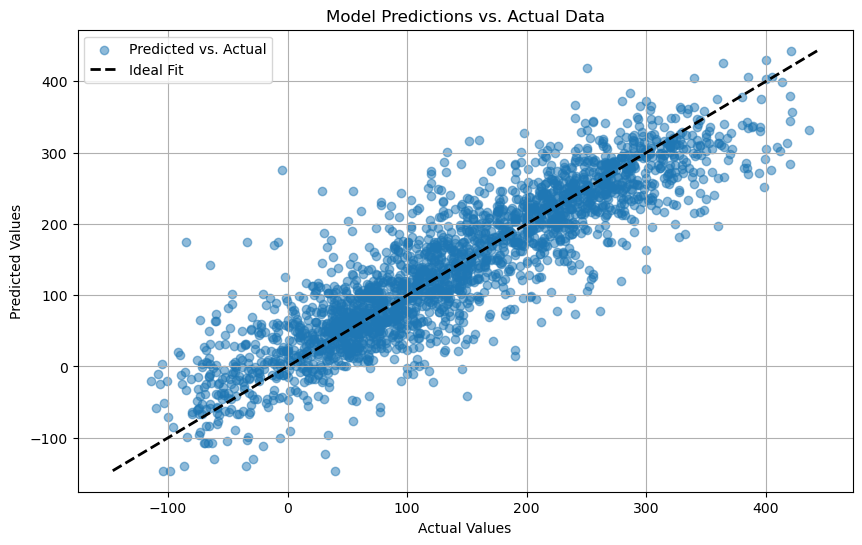

In [31]:
import matplotlib.pyplot as plt
import numpy as np
# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Scatter plot for actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs. Actual')

# Ideal line for perfect predictions
max_val = max(max(y_test), max(y_pred))  # Find the maximum value for setting plot limits
min_val = min(min(y_test), min(y_pred))  # Find the minimum value for setting plot limits
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ideal Fit')

# Customization and labels
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs. Actual Data')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### The Bland-Altman plot

The Bland-Altman plot, also known as a Difference plot or Limits of Agreement plot, is a graphical method used to compare two sets of measurements or methods that are intended to measure the same parameter. It's widely used in the medical sciences and various fields of research to assess the agreement between two different assays or measurement techniques. The plot helps identify systematic differences between the measurements and any potential outliers or trends.

**How the Bland-Altman Plot Works**
To create a Bland-Altman plot, you follow these steps:

* **Calculate the Mean and Difference**: For each pair of measurements, calculate the mean (the average of the two measurements) and the difference (subtract one measurement from the other). The choice of which measurement to subtract from which is not crucial, as long as you are consistent.
* **Plot the Data**: On the plot, the x-axis represents the mean of the two measurements (showing the average magnitude of the measurement), and the y-axis represents the difference between the two measurements (indicating the degree of disagreement).
* **Calculate Limits of Agreement**: The mean difference (also known as the bias) is calculated and plotted as a horizontal line. Around this line, the upper and lower limits of agreement are plotted. These limits are typically calculated as the mean difference plus and minus 1.96 times the standard deviation of the differences, assuming a normal distribution of the differences. These limits indicate where most (approximately 95%) of the differences between measurements are expected to lie.

**What the Bland-Altman Plot Shows**
* **Bias**: The average difference between the two methods. A bias close to zero suggests that there is no systematic difference between the methods.
* **Limits of Agreement**: The range within which most differences between measurements lie. Narrow limits indicate good agreement; wide limits suggest poor agreement.
* **Trends or Patterns**: The plot can reveal trends, such as increasing differences at higher or lower values, which might indicate a proportional bias or that one method is more variable than the other.

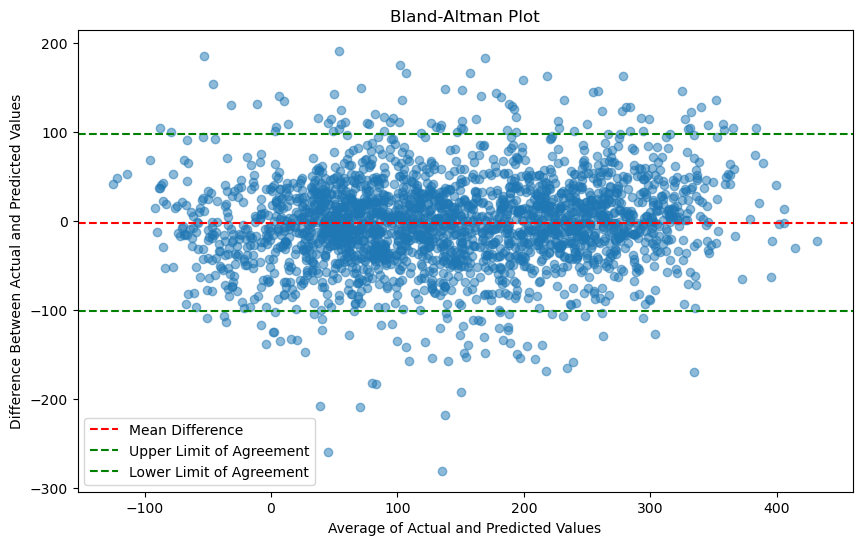

In [35]:
avg = (y_test + y_pred) / 2
diff = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(avg, diff, alpha=0.5)
plt.axhline(y=np.mean(diff), color='r', linestyle='--', label='Mean Difference')
plt.axhline(y=np.mean(diff)+1.96*np.std(diff), color='g', linestyle='--', label='Upper Limit of Agreement')
plt.axhline(y=np.mean(diff)-1.96*np.std(diff), color='g', linestyle='--', label='Lower Limit of Agreement')
plt.xlabel('Average of Actual and Predicted Values')
plt.ylabel('Difference Between Actual and Predicted Values')
plt.title('Bland-Altman Plot')
plt.legend()
plt.show()

### Analysis in context
In the context of machine learning for polymer chemistry, applying a Bland-Altman plot offers a unique perspective on evaluating the agreement between actual properties of polymers, such as glass transition temperature, and their predicted values obtained from a model. This approach is particularly useful when comparing two different measurement techniques or models to understand the consistency of predictions across the range of observed values.


* **Bias Detection**: The mean difference line helps identify if there's a systematic bias in predictions (e.g., consistently overestimating or underestimating polymer properties).
* **Limits of Agreement**: The limits of agreement indicate how much variation is expected in the predictions. Narrow limits suggest high agreement between actual and predicted values, while wide limits indicate greater variability and less precision.
* **Outliers and Trends**: Observing points outside the limits of agreement or trends (e.g., increasing difference with higher property values) can inform about specific areas where the model may need improvement, such as incorporating more features related to polymer structure or processing conditions.